### STEP - 1 

In [38]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### STEP - 2

In [39]:
np.random.seed(0) #selected random seem as 0

n_samples = 200 #choosed no.of samples per cluster to be 200

### STEP - 3

In [40]:
#Guassian Parameters
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]

mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]

mu3 = [-2, -2]
sigma3 = [[1, 0], [0, 0.9]]

mu4 = [-4, 8]
sigma4 = [[0.8, 0], [0, 0.6]]

### STEP - 4

In [41]:
#generating data
cluster_1 = np.random.multivariate_normal(mu1, sigma1, n_samples)
cluster_2 = np.random.multivariate_normal(mu2, sigma2, n_samples)
cluster_3 = np.random.multivariate_normal(mu3, sigma3, n_samples)
cluster_4 = np.random.multivariate_normal(mu4, sigma4, n_samples)

generated_data = np.vstack([cluster_1, cluster_2, cluster_3, cluster_4])

### STEP - 5

In [42]:
wcss = []

for k in range(1,21):
    kmeans = KMeans(n_clusters= k, random_state= 0)
    kmeans.fit(generated_data)
    wcss.append(kmeans.inertia_)

print(f"WCSS values calculated for k = 1 to 20 \n {wcss}")

WCSS values calculated for k = 1 to 20 
 [21667.36583965078, 13032.05353159331, 2787.311540381476, 1108.449861131376, 997.7017324438617, 876.7876729710326, 776.7985038680331, 772.4796198635645, 671.4003128606247, 578.23884733947, 536.6733042974032, 504.16495830701257, 483.5029056554697, 459.3775811657455, 411.4554501069982, 396.2144537224769, 391.6083526310525, 375.6832566298096, 338.99253363614895, 319.18982810102614]


### STEP - 6

In [43]:
#verified that optimal k is 4 in STEP-7
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_optimal.fit(generated_data)
centroids = kmeans_optimal.cluster_centers_
print(f"Cluster centers are : \n{centroids}")

Cluster centers are : 
[[-1.86772798 -1.98967591]
 [-4.04276546  8.04162172]
 [ 4.9070218   4.91752347]
 [ 2.039605    1.93125996]]


### STEP - 7

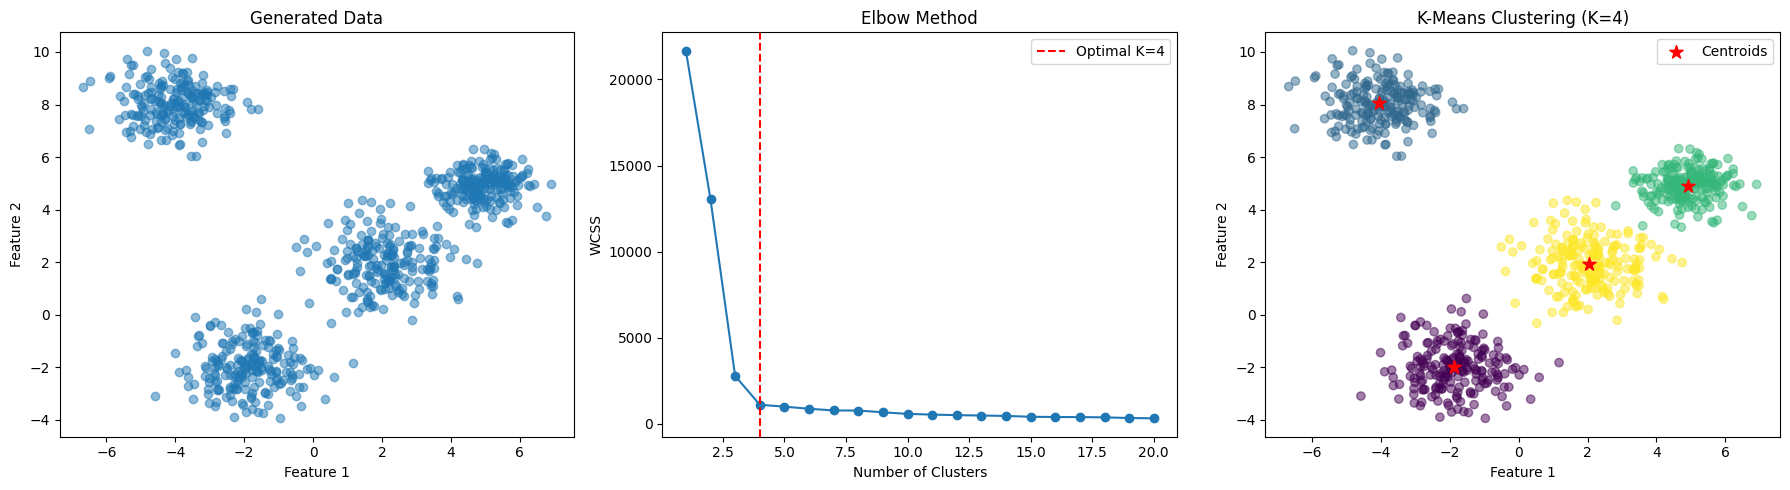

In [44]:
labels = kmeans_optimal.predict(generated_data)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(generated_data[:, 0], generated_data[:, 1], alpha = 0.5)
axes[0].set_title('Generated Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

axes[1].plot(range(1, 21), wcss, marker='o')
axes[1].set_title('Elbow Method')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('WCSS')
axes[1].axvline(x=4, color='red', linestyle='--', label='Optimal K=4')
axes[1].legend()

axes[2].scatter(generated_data[:, 0], generated_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
axes[2].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroids')
axes[2].set_title('K-Means Clustering (K=4)')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].legend()

plt.tight_layout()
plt.show()

### REPORT

##### *Q1:* What might happen if the value of the number of clusters is set too high or too low in K-Means?

- If K value is too low, then the algortithm will force dissimilar points into the same cluster. 
- If the value of k is too high, The algorithm will try to make unnecessary clusters leading to overfitting and poor generalisation 

##### *Q2:* What is the effect of initializing centroids far apart or too close together in K-Means, and how might this affect the final clustering?

- If centroids are initialised far apart then it might miss dense regions 
- If centroids are close together then they try to cluster the same region potentially leaving other regions untouched

##### *Q3:* How might you optimize the centroid initialization to lead to better clustering?

- We can use K-Means++ initialisation. which selects initial centroids that are distant from one another
- For better clusterring we could also run K-Means with random initialisation multiple times and report one with best result based on WCSS

##### *Q4:* Why might the Elbow Method not always provide a clear solution for choosing the optimal number of clusters? 

- The elbow point may not be clearly defined if the WCSS decreases gradually without any sharp bend (elbow point)

##### *Q5:* How can WCSS be influenced by the presence of outliers or noise in the data? 


- Outliers increase WCSS significantly as they are far from cluster centroids.
- They can pull centroids away from the true cluster centers or form their own sparse clusters essentialy making the elbow point in the elbow curve harder to identify.